# PGM - finedust linear regression by Bayesian Modeling

@befreor

In [9]:
from PGM.access_data import dbAccess

import numpy as np
import pandas as pd
import pymc3
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz

In [10]:
# example: 10_2016 - PM10, PM25, SO2, O3
pvId = "10"
year = "2016"
db = dbAccess("PGM/%s_db_%s.csv" % (pvId,year))
db_data = db.get_data("2016-01-01 08:00", "2016-01-01 18:00", "PV", "PM10","PM25","SO2", "O3")
data = pd.DataFrame(db_data)
print(data)

                   time      PV PM10 PM25    SO2     O3
0   2016-01-01 08:00:00    0.24   50   31  0.002  0.013
1   2016-01-01 09:00:00   115.2   49   28  0.002  0.011
2   2016-01-01 10:00:00  367.92   51   32  0.003  0.014
3   2016-01-01 11:00:00  585.24   64   34  0.003  0.022
4   2016-01-01 12:00:00  669.12   54   31  0.003  0.029
5   2016-01-01 13:00:00  695.52   59   38  0.005  0.033
6   2016-01-01 14:00:00  660.24   66   35  0.006  0.034
7   2016-01-01 15:00:00  485.88   68   37  0.014  0.035
8   2016-01-01 16:00:00  307.44   76   41  0.008  0.038
9   2016-01-01 17:00:00   80.16   56   37  0.003  0.039
10  2016-01-01 18:00:00    2.64   43   28  0.003  0.036


In [11]:
# learning data
# xs
pm10 = data.PM10.values.astype(float)
pm25 = data.PM25.values.astype(float)
so2 = data.SO2.values.astype(float)
o3 = data.O3.values.astype(float)
# y
pv = data.PV.values.astype(float)

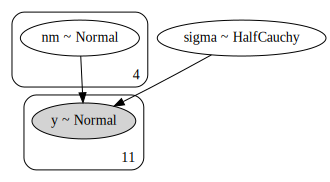

In [4]:
with Model() as pooled_model:

    nm = Normal('nm', 0, sigma=1e5, shape=[len(data.columns) - 2]) # params except "time" and "PV"
    sigma = HalfCauchy('sigma', 5)

    theta = nm[0] * pm10 + nm[1] * pm25 + nm[2] * so2 + nm[3] * o3

    y = Normal('y', theta, sigma=sigma, observed=pv)
    
model_to_graphviz(pooled_model)

In [5]:
with pooled_model:
    pooled_trace = sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, nm]
Sampling 2 chains, 50 divergences: 100%|██████████| 4000/4000 [00:09<00:00, 403.27draws/s]
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.


In [6]:
m0 = pooled_trace['nm'].mean(axis=0)

In [7]:
# estimated parameters
m0

array([   23.33718338,   -30.79691913, -1969.28974829,  2246.65829956])